# Exercise 4

Work on this before the next lecture on 26 April. We will talk about questions, comments, and solutions during the exercise after the third lecture.

Please do form study groups! When you do, make sure you can explain everything in your own words, do not simply copy&paste from others.

The solutions to a lot of these problems can probably be found with Google. Please don't. You will not learn a lot by copy&pasting from the internet.

If you want to get credit/examination on this course please upload your work to your GitHub repository for this course before the next lecture starts and post a link to your repository in [this thread](https://github.com/wildtreetech/advanced-computing-2018/issues/8). If you worked on things together with others please add their names to the notebook so we can see who formed groups.

The overall idea of this exercise is to get you using and building convolutional neural networks.

## Question 1

In the last exercise you built a neural network that can classify fashion items using only densely connected layers.

Build on this by using convolutions, pooling, dropout, batch norm, etc in your neural network. Can you outperform your densely connected network?

Start with a small network and a fraction of the data to check if you hooked everything up correctly. Don't go overboard with the size of the network either as even small networks take quite a while to train.

(If you want to experiment with a free GPU checkout https://kaggle.com/kernels .)

In [6]:
# plotting imports and setup
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14

from sklearn.datasets import make_classification

import numpy as np

In [2]:
# your code here
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from keras import utils
from keras.models import Model
from keras.layers import Input, Dense, Activation, Flatten, Conv2D, MaxPool2D



(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype(np.float64)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype(np.float64)

#X_train = X_train.astype('float32')
#X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size=10000,random_state=42)

num_classes = 10
y_train = utils.to_categorical(y_train, num_classes)
y_val = utils.to_categorical(y_val, num_classes)

Using TensorFlow backend.


In [3]:
#Network Architecture
print(X_train.shape)

input_image = Input(shape=(28, 28, 1))
x = Conv2D(32, 5, activation='relu')(input_image)
x = MaxPool2D(2, strides=2)(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(10, activation='softmax')(x)
convnet1 = Model(inputs=input_image, outputs=x)

input_image = Input(shape=(28, 28, 1))
x = Conv2D(32, 5, activation='relu')(input_image)
x = MaxPool2D(2, strides=2)(x)
x = Conv2D(64, 3, activation='relu')(x)
x = MaxPool2D(2, strides=2)(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
x = Dense(10, activation='softmax')(x)
convnet2 = Model(inputs=input_image, outputs=x)


convnet1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
convnet2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print('\n','First model with 1 convolution','\n')
convnet1.summary()
print('\n','\n','Second model with 2 convolutions','\n')
convnet2.summary()

(50000, 28, 28, 1)

 First model with 1 convolution 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1179904   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 1,183,306
Trainable params: 1,183,306
Non-trainable params: 0
____________

In [4]:
history_callback1 = convnet1.fit(X_train, y_train,batch_size=128,
                               epochs=10, 
                               verbose=1,validation_data=(X_val, y_val))

history_callback2 = convnet2.fit(X_train, y_train,batch_size=128,
                               epochs=10, 
                               verbose=1,validation_data=(X_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 19s 377us/step - loss: 0.4584 - acc: 0.8405 - val_loss: 0.3331 - val_acc: 0.8797
Epoch 2/10
50000/50000 [==============================] - 19s 384us/step - loss: 0.3057 - acc: 0.8923 - val_loss: 0.2925 - val_acc: 0.8919
Epoch 3/10
50000/50000 [==============================] - 19s 373us/step - loss: 0.2609 - acc: 0.9069 - val_loss: 0.2871 - val_acc: 0.8962
Epoch 4/10
50000/50000 [==============================] - 18s 363us/step - loss: 0.2316 - acc: 0.9148 - val_loss: 0.2730 - val_acc: 0.9007
Epoch 5/10
50000/50000 [==============================] - 18s 363us/step - loss: 0.2055 - acc: 0.9245 - val_loss: 0.2578 - val_acc: 0.9034
Epoch 6/10
50000/50000 [==============================] - 18s 364us/step - loss: 0.1855 - acc: 0.9320 - val_loss: 0.2561 - val_acc: 0.9064
Epoch 7/10
50000/50000 [==============================] - 18s 360us/step - loss: 0.1649 - acc: 0.9399 - val_loss: 0.

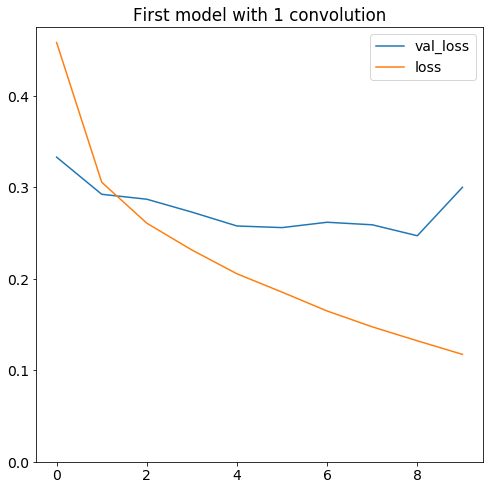

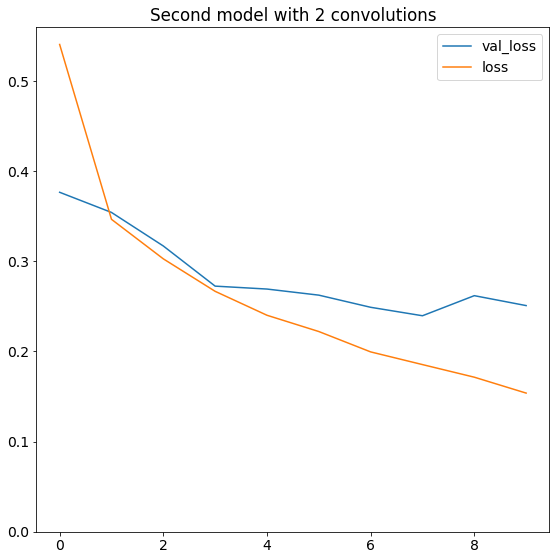

In [103]:
#plt.subplot(2,1,1)
plt.plot(history_callback1.history['val_loss'], label='val_loss')
plt.plot(history_callback1.history['loss'], label='loss')
plt.ylim([0, None])
plt.title('First model with 1 convolution')
plt.legend()
plt.show()

#plt.subplot(2,1,2)
plt.plot(history_callback2.history['val_loss'], label='val_loss')
plt.plot(history_callback2.history['loss'], label='loss')
plt.ylim([0, None])
plt.title('Second model with 2 convolutions')
plt.legend()
plt.tight_layout()
plt.show()



## Question 2

For most real world applications we do not have enough labelled images to train a large neural network from scratch. Instead we can use a pre-trained network as a feature transformer and train a smaller model (or even just a logistic regression) on the output of the pre-trained network.

There are several pretrained networks available as part of keras: https://keras.io/applications/. The documentation usually gives some information or links about each network.

The documentation also contains snippets on how to use a pre-trained network as feature transformer ("Extract features with VGG16"). You should be able to generalise from that example using VGG16 to approximately any of the networks available there.

One important thing to not forget is that you need to preprocess your images before feeding them into a pretrained network. Keras provides the functions to do that as well, use them :) You might also need to resize your images first.

The task for this question is to build a classifier that can tell road bikes from mountain bikes. Start with using a pre-trained network as feature transformer and logistic regression as classifier on the output of the pretrained network. Once this works you can experiment with extracting features from earlier layers of the pre-trained network, compare your performance to a small network trained from scratch, try to beat your neural net by extracting features by hand and feeding them to a random forest, increasing your dataset size by [augmenting the data](https://keras.io/preprocessing/image/), etc.

The dataset containing about 100 labelled images for each road and mountain bikes is here: https://github.com/wildtreetech/advanced-computing-2018/blob/master/data/road-and-mountain-bikes.zip

In [98]:
from keras import applications
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Activation, Flatten
import numpy as np
import h5py
import glob


# for example load the VGG16 network
model = applications.VGG16(include_top=False,weights='imagenet')

img_path_mountain = 'bikes/mountain_bikes/*.jpg'
img_path_road = 'bikes/road_bikes/*.jpg'

mountain_bikes = glob.glob(img_path_mountain)
road_bikes = glob.glob(img_path_road)

bikes = np.append(mountain_bikes,road_bikes)
labels = np.append(np.zeros(len(mountain_bikes)),np.ones(len(road_bikes)))

print(bikes.shape)

bikes_img = [image.load_img(bikes[i], target_size=(224, 224,3)) for i in range(len(bikes))]

x = [image.img_to_array(bikes_img[i]) for i in range(len(bikes))]

x = np.asarray(x)

X_train,X_val,y_train,y_val = train_test_split(x,labels,test_size=.8,random_state=42)

print(X_train.shape)
print(y_train.shape)


features_train = model.predict(X_train)
features_val = model.predict(X_val)

(211,)
(42, 224, 224, 3)
(42,)


In [99]:
#print(features_train.shape)
print(len(features_train[0].reshape(-1)))

features_train = [features_train[i].reshape(-1) for i in range(len(features_train))]
features_val = [features_val[i].reshape(-1) for i in range(len(features_val))]

features_train = np.asarray(features_train)
features_val = np.asarray(features_val)

print(features_train.shape)
print(features_val.shape)

25088
(42, 25088)
(169, 25088)


In [100]:
num_classes = 2
#y_train = utils.to_categorical(y_train, num_classes)
#y_val = utils.to_categorical(y_val, num_classes)

inputs = Input(shape=(features_train.shape[1],))

#h = Dense(256, activation='relu')(inputs)
#h = Dense(64, activation='relu')(h)
h=Activation('tanh')(inputs)
h = Dense(10)(h)
#h = Activation('relu')(h)
predictions = Activation('softmax')(h)

model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_49 (InputLayer)        (None, 25088)             0         
_________________________________________________________________
activation_60 (Activation)   (None, 25088)             0         
_________________________________________________________________
dense_58 (Dense)             (None, 10)                250890    
_________________________________________________________________
activation_61 (Activation)   (None, 10)                0         
Total params: 250,890
Trainable params: 250,890
Non-trainable params: 0
_________________________________________________________________


In [101]:
history = model.fit(features_train, y_train,epochs=10,verbose=0,validation_data=(features_val, y_val))

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(features_train, y_train)

rfc_score = rfc.score(features_val, y_val)
print('Score of the Random Forest Classifier  :  ',rfc_score)
print('Score of the pre-trained NN Classifier :  ',history.history['acc'][-1])

Score of the Random Forest Classifier  :   0.976331360947
Score of the pre-trained NN Classifier :   1.0


We can see that both Random Forest and pre-trained neural networks are close. They get closer as we make the training set bigger, as would be expected.
However, it would be difficult for a Random Forest Classifier to beat this neural network.

## Question 3

Think about what project you want to do. What makes a good project? It should use some of what you learnt in this class, there should be labelled data available already, and it should be something you are interested in.

You will have to write a short report on what you did. To write an interesting report you need to tell a story, not just first I did A, then I did B, then I did X and finally D.

It also has to go a bit beyond simply training a classifier or regression model.

An example based on the bike images from the previous question:

A local bike shop wants to keep an eye on sales of bikes on ebay. They specialise in road bikes so they want to be able to filter out all adverts for mountain bikes. They have found that people writing ebay adverts are not very good at correctly labelling their adverts. Can they use machine-learning to help classify adverts?

We investigate labelling adverts based on the image in the advert and study different trade offs in misclassifying bikes. The network was trained on 100 images from a catalog which show bikes on a white background. We compare the performance of the network on the training data and a small set of hand labelled images of bikes in the wild.